In [12]:
""" Data preparation """
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Anonymous data
w            = [30,    30,     50,     20,     50,     40,    80,    30,   60,    60,    80,    80, 20, 20]
l            = [30,    30,     30,     40,     50,     80,    80,    30,   60,    60,    80,    20, 80, 20]
alt_peak_IC  = [11.43, 16.68,  27.05,  21.08,  40.54,  42.12, 71.94, 4.42, 13.27, 26.85,  25.13, 37.85, 17.60, 19.58]
ust_peak_IC  = [6.58,  10.29,  17.77,  13.00,  28.37,  29.59, 53.00, 2.61, 9.80,  19.68,  18.97, 25.47, 12.01, 12.44]
alt_peak_dis = [8.36, 12.74,  23.09,  16.98,  37.08,  38.63, 64.73, 3.22, 11.18, 23.32, 22.01, 32.32, 15.78, 17.32]
ust_peak_dis = [5.41, 8.97,   16.29,  11.19,  27.07,  28.64, 51.08, 2.15, 8.85,  18.77, 18.07, 24.44, 11.50, 11.40]

W = np.asarray(w*2)
L = np.asarray(l*2)

IC_param = np.divide(ust_peak_IC,alt_peak_IC)
dis_param = np.divide(ust_peak_dis,alt_peak_dis)
params = np.hstack((IC_param,dis_param))

""" The data is not linearly seperable """
y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
data = np.asarray([W*L, params, np.asarray(y)])
X = data[:-1].T

(14, 2)


Text(0, 0.5, 'Feature 2')

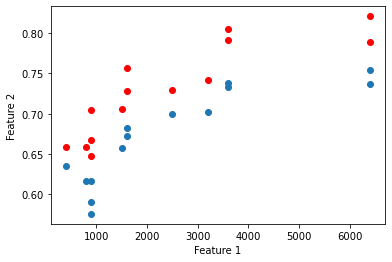

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[0:14].T[0],X[0:14].T[1])
plt.scatter(X[14:28].T[0],X[14:28].T[1], color="red")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=42, max_depth=5)
""" min_samples_leaf:the minimum number of samples a leaf node must have
    max_depth: maximum depth of the tree
    min_samples_split: the minimum number of samples a node must have before it can be split
""" 
tree_clf.fit(X, y)
print(tree_clf.predict(X))
print(str(tree_clf.score(X,y)*100)+"%")